## Eliminacion de valores faltantes

 Una de las dos formas de tratar variables faltantes. 

 Cuando trabajamos con la eliminación de valores faltantes <b>asumimos</b> que los valores faltantes están perdidos completamente al azar "MAR"

In [1]:
%run 0.4-Codificacion.ipynb
%run pandas-API.ipynb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
datos_sustituidos.info(numeric_only=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5764 entries, 0 to 5763
Data columns (total 50 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   estoy_trabajando_en                                       5764 non-null   object 
 1   donde_estas_trabajando                                    5764 non-null   object 
 2   dedicacion                                                5764 non-null   object 
 3   tipo_de_contrato                                          5764 non-null   object 
 4   ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local  5764 non-null   float64
 5   ultimo_salario_mensual_o_retiro_neto_en_tu_moneda_local   5555 non-null   object 
 6   pagos_en_dolares                                          1549 non-null   object 
 7   dolarizado_cual_fue_el_ultimo_valor                       983 non-null    object 
 8   pagos_en_criptomon

Funcion para pasar columnas que son de tipo object al tipo Numerico, pasando los datos extranios a tipo de datos nulos.
 Procedemos a usarla para la variable: 'dolarizado_cual_fue_el_ultimo_valor'

In [4]:
def purification_column(datos, variable):
    for indice, valor in datos[variable].items():
        try:
            datos.at[indice, variable] = float(valor)
        except ValueError:
            #print(f"El valor en la fila {indice} no se puede, dice: ",valor)
            datos.at[indice, variable] = np.nan
    datos[variable]= pd.to_numeric(datos[variable], errors='coerce')
purification_column(datos_sustituidos,'dolarizado_cual_fue_el_ultimo_valor')

In [6]:
#Veremos cuantos datos tenemos y cuandos datos son en total
datos_sustituidos.dolarizado_cual_fue_el_ultimo_valor.size, datos_sustituidos.dolarizado_cual_fue_el_ultimo_valor.count()

(5764, 778)

In [9]:
datos_sustituidos.mean(skipna=False)

/tmp/ipykernel_5642/2892063238.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  datos_sustituidos.mean(skipna=False)


ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local    437289.328248
dolarizado_cual_fue_el_ultimo_valor                                   NaN
de_que_fue_el_ajuste_total_acumulado                                  NaN
ingresos_laborales_comparados_con_el_semestre_anterior           2.674011
que_tan_conforme_estas_con_tus_ingresos_laborales                2.615892
anos_de_experiencia                                              7.124705
antigüedad_en_la_empresa_actual                                  2.966967
tiempo_en_el_puesto_actual                                       2.467332
cuantas_personas_a_cargo_tenes                                   2.002602
si_trabajas_hibrido_cuantos_dias_a_la_semana_vas                 0.657529
la_recomendas_como_un_buen_lugar_para_trabajar                   6.735947
cuanto_cobras_por_guardia                                             NaN
tengo_edad                                                      33.636711
sueldo_dolarizado                     

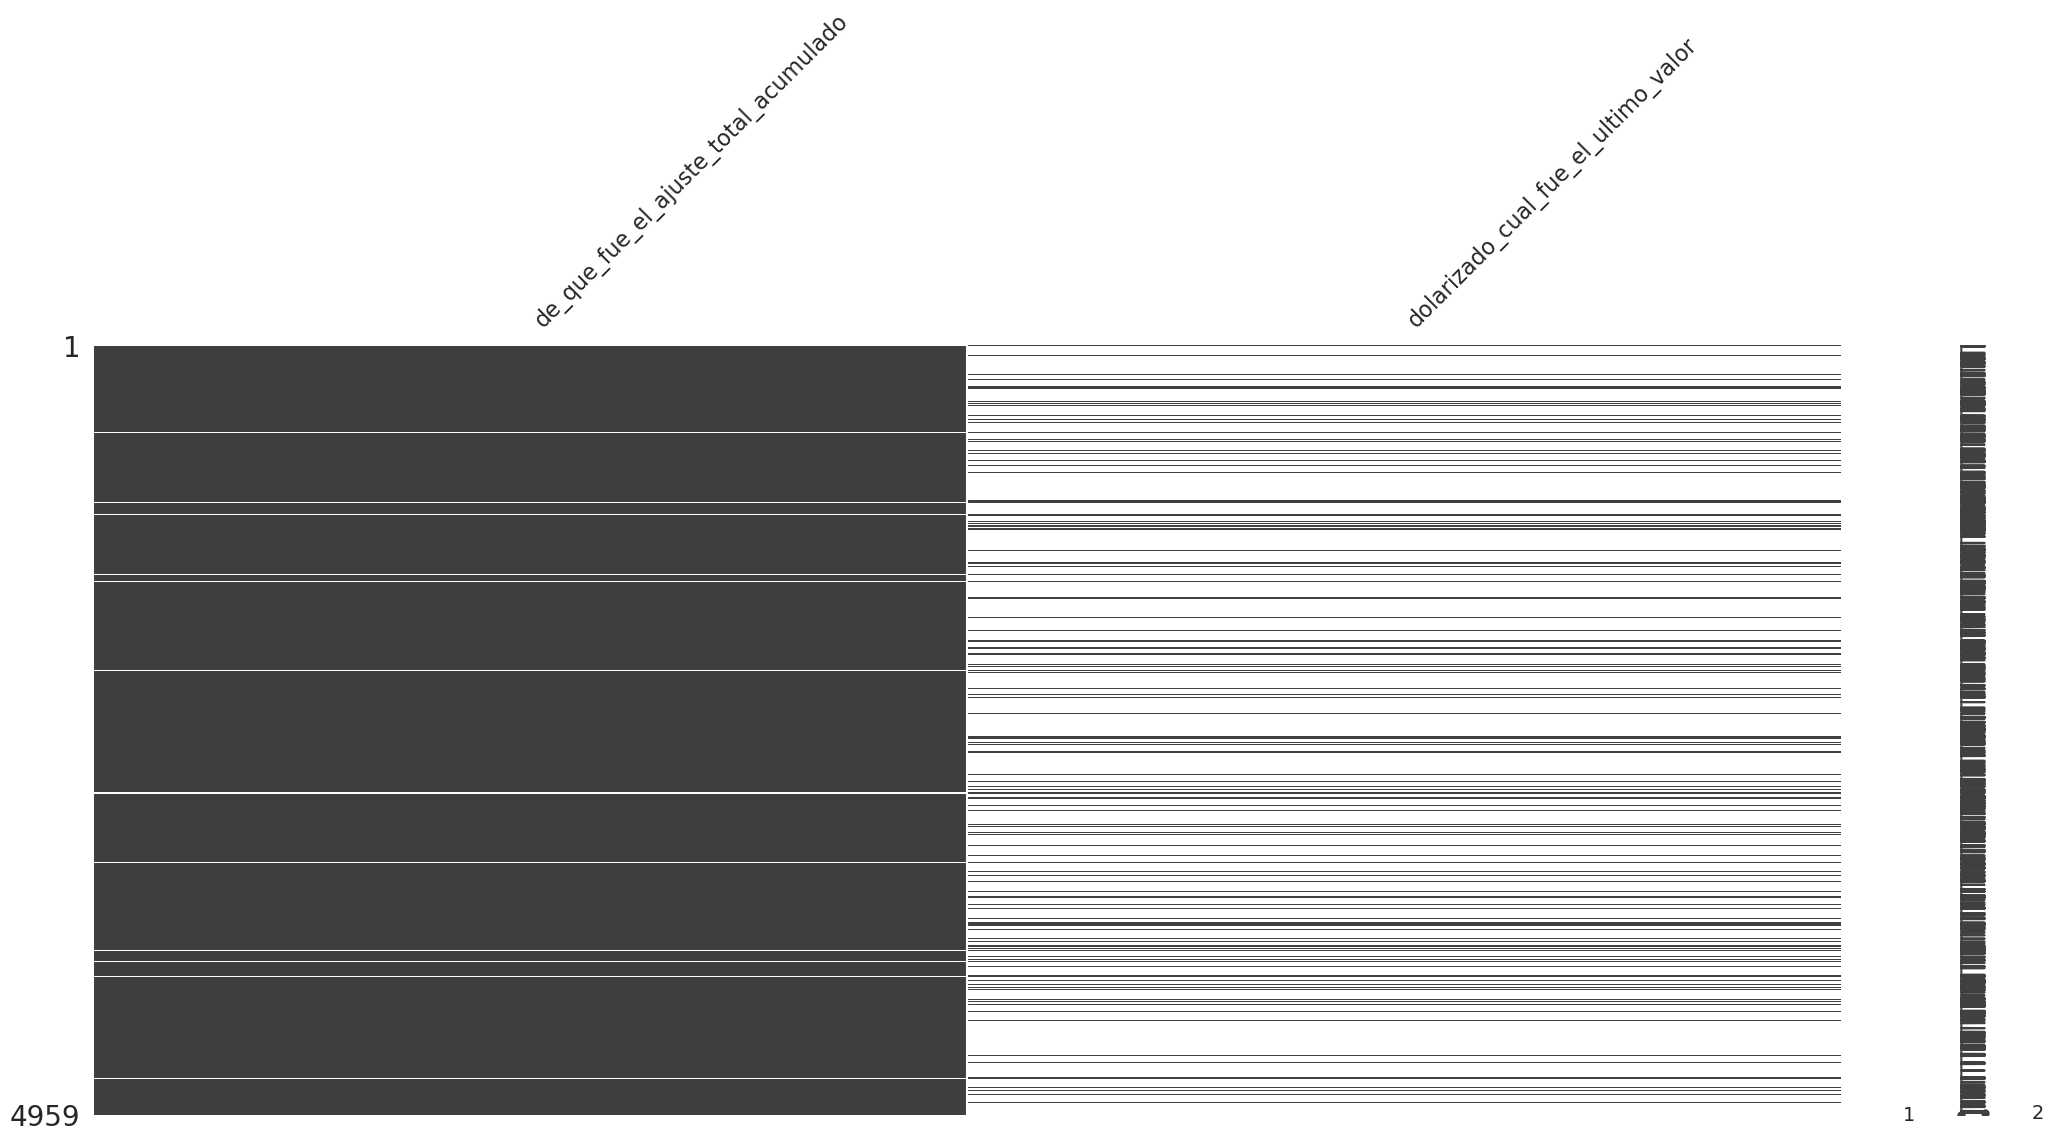

In [20]:
#Listwise Deletion or Complete Case
(
    datos_sustituidos
    .dropna(
        subset=['de_que_fue_el_ajuste_total_acumulado','dolarizado_cual_fue_el_ultimo_valor'],
        how = "all"
    )
    .select_columns(['de_que_fue_el_ajuste_total_acumulado','dolarizado_cual_fue_el_ultimo_valor'])
    .pipe(missingno.matrix)
);